# Analysis of Variance (ANOVA)
### By Alex Zimbalist

## Julia Setup

In [ ]:
using Pkg; Pkg.add("Plots"), Pkg.add("Distributions"), Pkg.add("DataFrames"), Pkg.add("CSV")
using Plots, Distributions, DataFrames, CSV

using Pkg; Pkg.add("PrettyTables")
using PrettyTables

## Introduction

If you ever read scientific studies, you have probably come across the term $\textit{ANOVA}$ countless times. ANOVA, or analysis of variance, is a common statistical test that pervades publications in every field of research. However, at least in my experience and from what I have gathered talking to numerous "mathy" friends of mine, ANOVA  does not get its fair share of the spotlight in introductory statistics courses. For some time it bothered me that, despite my bachelor's degree in applied math, I lacked the fundamental statistical background to understand how countless studies make sense of the data they collect. Recently, I set off on a mission to rectify this issue. As it turns out, ANOVA is quite readily comprehensible for someone with a basic background in probability and statistics. The remainder of this blog will shed light on the highly prevalent but often not understood ANOVA test.

## What is ANOVA and When is it Used?

Let's suppose we have data on post-graduation salary for random samples of students from Yale, Harvard, Stanford, and MIT. We want to know whether or not average post-graduation salary is the same for graduates from all 4 of the aforementioned universities. How can we take a disciplined approach to answering this question?

We recall that a two-sample t-test can be used to compare the means of two samples. For instance, we could use a two-sample t-test to assess whether or not the average post-graduation salary of Yale students is the same as the average post-graduation salary of Harvard students. Similarly, we could test whether or not the average post-graduation salary of Stanford students is the same as the average post-graduation salary of MIT students. However, if our goal is to ask whether or not the average post-graduation salary of students from each of the 4 aforementioned universities is the same, we must perform $3+2+1=6$ two-sample t-tests. In fact, the number of t-tests we would need to perform to assess whether there is equality across $\textit{all}$ n groups is given by the expression $\frac{(n-1)(n-2)}{2}$. While 6 t-tests in the present example is already a bit excessive, we can see from this expression that the number of t-tests needed to answer this type of question grows very fast as n gets large. Further, if we are performing that many two-sample t-tests, we must take into account that the more tests we perform, the more likely that in at least one test we falsely reject the null hypothesis. This issue is common when performing multiple comparisons; commonly, the Bonferroni correction adjusts the significance thresholds in each individual statistical test such that the probability of a single false rejection of the null across all tests remains below a preset threshold, such as the standard 0.05 acceptable false positivity rate. While this type of approach is feasible, it is a lot of work, and we would like a better method.

Another candidate approach for this type of problem would be using a chi-squared test. However, the chi-squared test only applies when we are working with categorical response variables, and in this scenario the response variable is salary, which is clearly quantitative. We could partition salary into multiple categories, say under $50,000, between $50,000 and $80,000, and over $80,000, thereby making the response variable categorical. This approach is totally valid, but it somewhat changes the question that we are trying to answer, and loses a lot of the detail present in the data. What we really want is a test that, like the chi-squared test, compares multiple different groups at once, but, like the two-sample t-test, compares the means of quantitative variables.

It should be no surprise that the solution we are looking for is analysis of variance, or ANOVA. With this approach, we can directly test the null hypothesis that the mean of each group sampled from is the same. One simplifying aspect of ANOVA (or at least one-way ANOVA... more on that later) is that the null hypothesis never changes; it is always that the mean of each group sampled from is the same. The alternative hypothesis, then, is that the means of all the groups sampled from are NOT the same. If we fail to reject the null hypothesis, we conclude that average post-graduation salary is the same at each of the four universities. However, if we reject the null hypothesis, all we have uncovered is that there is some difference in average post-graduation salary among the 4 universities; we do not make any inferences about which school's graduates earn more money after graduation or which school's graduates earn less money after graduation. Such determinations are beyond the scope of the ANOVA test. That being said, there are methods for tackling these more fine-grain questions, which are known collectively as "post hoc" methods. While the majority of this blog post will discuss the ANOVA test itself, post hoc methods will be briefly discussed later on.

ANOVA is used to analyze data from studies all the time. Any time researchers want to compare 2 or more experimental groups to a control group, we have 3 or more categorical explanatory (independent) variables. If the data being collected is quantitative, ANOVA is the most appropriate statistical test to apply. To rattle off a few examples of questions ANOVA could answer:

Is there a significant difference in blood pressure among patients assigned to one of 3 dietary interventions (Mediterranean diet, Atkin's diet, and control group)? 

Is there a significant difference in covid recovery time among black, white, and asian people?

Is there a significant difference in stress hormone level among patients from each of 3 different drug treatment programs (50 mg of miracle drug per day, 100 mg of miracle drug per day, placebo)?


## Understanding ANOVA

Now that we have motivated the need for ANOVA, let's back up and look at the method more closely. In the original example given, we want to know if the average post-graduation salary is the same for students from Yale, Harvard, Stanford, and MIT. In this example, there is 1 independent variable, university attended, and one dependent variable, post-graduation salary. To analyze the null hypothesis that post-graduation salaries of students from each of the universities is the same, we perform a $\textit{one-way ANOVA}$. We call this ANOVA $\textit{one-way}$ since there is only 1 independent variable.

There are a few assumptions to check before proceeding to perform a one-sided ANOVA test. Samples must be drawn independently and the populations they are drawn from must be normally distributed. We also need to assume that variance within each group is similar. Okay, now we are set to proceed.

ANOVA basically works by looking at the variance within each group, and comparing that to the variance between each group (specifically, how different the means of each group are). In fact, we can write the test statistic for ANOVA, known as the F statistic, as $\frac{variance \: between \: groups}{variance \: within \: groups}$. To determine how likely this F statistic is given the null hypothesis of equal means in each group, we see where it falls on the F distribution. Like with all statistical tests, we reject the null hypothesis if the test statistic falls in the rejection region. Note that all ANOVA tests are inherently one-sided, as the F distribution has only one tail; we are always more likely to reject the null hypothesis the larger the value of the F statistic.

Typically, the F distribution looks something like the distributions shown below, but be aware that the shape of the distribution changes significantly based on the two degrees of freedom parameters, which are functions of sample size and the number of groups being compared. Note that the tail gets thinner when the degrees of freedom parameters are increased; this makes sense, since for larger samples we expect it to be easier to reject the null hypothesis if the means of each group are, in fact, not all the same.

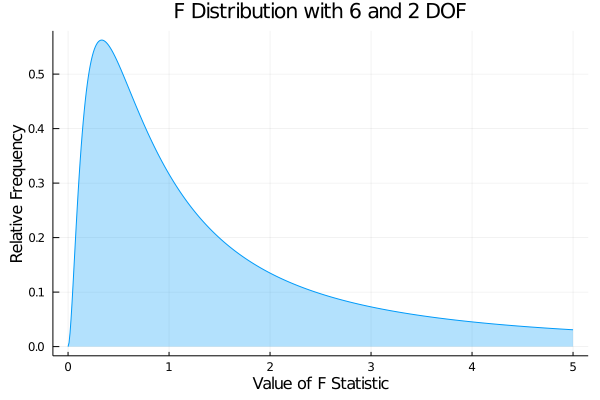

In [314]:
plot(0:.01:5, x -> pdf(FDist(6, 2), x), fillrange = 0, fillopacity = .3, title = "F Distribution with 6 and 2 DOF",
    ylabel = "Relative Frequency", xlabel = "Value of F Statistic", legend = false)

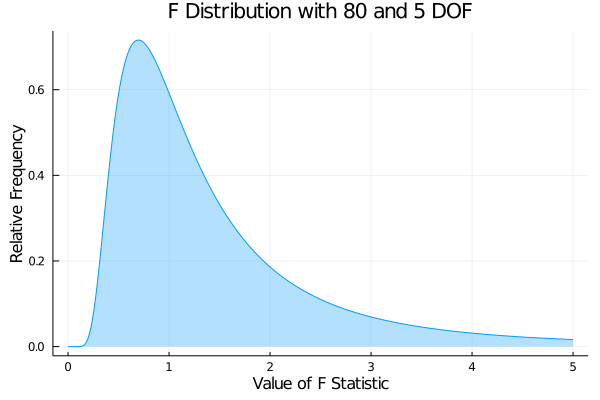

In [315]:
plot(0:.01:5, x -> pdf(FDist(80, 5), x), fillrange = 0, fillopacity = .3, title = "F Distribution with 80 and 5 DOF",
    ylabel = "Relative Frequency", xlabel = "Value of F Statistic", legend = false)

Let's build some intuition for why large F statistics provide evidence against the null hypothesis. The following graph shows 3 distributions that each have low variance and whose means are quite different:

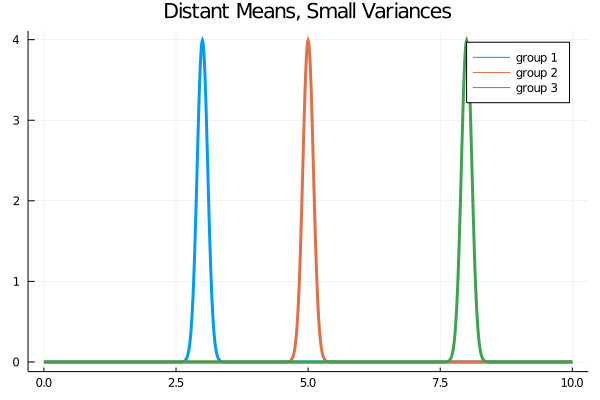

In [19]:
group_1 = x -> pdf(Normal(3,.1), x)
group_2 = x -> pdf(Normal(5,.1), x)
group_3 = x -> pdf(Normal(8,.1), x)
plot(0:.01:10, group_1, label = "group 1", linewidth = 3, title = "Distant Means, Small Variances")
plot!(0:.01:10, group_2, label = "group 2", linewidth = 3)
plot!(0:.01:10, group_3, label = "group 3", linewidth = 3)

We see that variance between groups is large, since the means are very far apart, and the variance within groups is small, since the distributions are tightly bunched around their means. The F statistic in this instance is going to be a large value (variance between groups) divided by a small value (variance within groups), yielding a very large value that is likely to fall in the tail of the F distribution and within the rejection region. Visually, it makes sense that we should reject the null hypothesis that the three groups have equal means.

There are also scenarios where the means of each group might be very close, but the variances of each group are so small that we reject the null anyway.

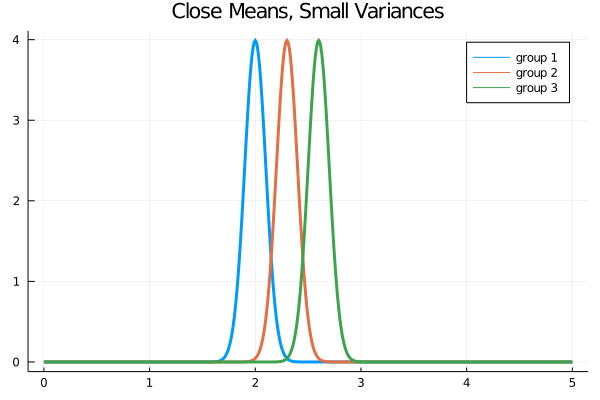

In [20]:
group_1 = x -> pdf(Normal(2,.1), x)
group_2 = x -> pdf(Normal(2.3,.1), x)
group_3 = x -> pdf(Normal(2.6,.1), x)
plot(0:.01:5, group_1, label = "group 1", linewidth = 3, title = "Close Means, Small Variances")
plot!(0:.01:5, group_2, label = "group 2", linewidth = 3)
plot!(0:.01:5, group_3, label = "group 3", linewidth = 3)

Alternatively, there are scenarios where the means of each group might be somewhat far apart, yet the variances are large enough that we still fail to reject the null.

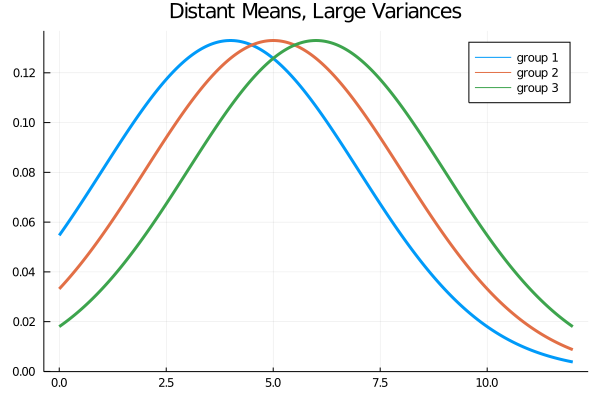

In [289]:
group_1 = x -> pdf(Normal(4, 3), x)
group_2 = x -> pdf(Normal(5, 3), x)
group_3 = x -> pdf(Normal(6, 3), x)
plot(0:.01:12, group_1, label = "group 1", linewidth = 3, title = "Distant Means, Large Variances")
plot!(0:.01:12, group_2, label = "group 2", linewidth = 3)
plot!(0:.01:12, group_3, label = "group 3", linewidth = 3)

So far we have established when to use ANOVA and the intuition behind the test statistic. We will now flesh out the mathematical details in a full-blown example.

## Example ANOVA

Let's suppose we surveyed random samples salary information for recent Yale, Harvard, Stanford, and MIT graduates. Disclaimer: I have generated fake random samples using Julia. The data we are working with in this example are entirely fictitious.

The samples are shown in the tables below:

In [170]:
harvard = rand(Normal(74, 15), 18);  # generate fake data
yale = rand(Normal(77, 15), 21);  # generate fake data
stanford = rand(Normal(83, 15), 19);  # generate fake data
mit = rand(Normal(81, 15), 24);  # generate fake data
schools = [harvard, yale, stanford, mit];  # combine data in 2d array

In [299]:
names = ["Harvard", "Yale", "Stanford", "MIT"]

vars = []
for i in 1:4
    data = round.(schools[i], digits=3)
    len = length(data)
    name = names[i]
    pretty_table(data, ["$name Salaries (thousands)", "sample size = $len"], crop = :none)
    println(pretty_table)  # show data in tables
end

┌──────────────────────────────┐
│ Harvard Salaries (thousands) │
│             sample size = 18 │
├──────────────────────────────┤
│                      102.726 │
│                       97.165 │
│                       48.873 │
│                       63.466 │
│                       47.727 │
│                       50.198 │
│                       48.958 │
│                       91.825 │
│                       75.034 │
│                       90.375 │
│                       82.389 │
│                       60.121 │
│                       66.773 │
│                       86.642 │
│                        82.02 │
│                       80.888 │
│                       82.823 │
│                       53.976 │
└──────────────────────────────┘
pretty_table
┌───────────────────────────┐
│ Yale Salaries (thousands) │
│          sample size = 21 │
├───────────────────────────┤
│                      89.4 │
│                    72.739 │
│                    73.109 │
│                 

We begin by checking the conditions for ANOVA. A quick look at the histograms of our samples indicate approximate normality, and we have no reason to believe that salaries should not be close to normally distributed.

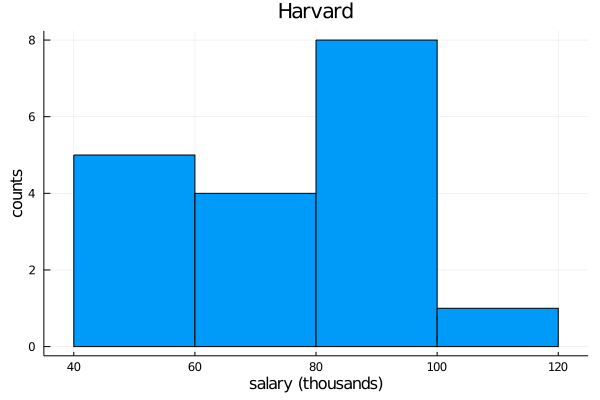

In [304]:
histogram(harvard, title = "Harvard", xlabel = "salary (thousands)", ylabel = "counts", legend = false)

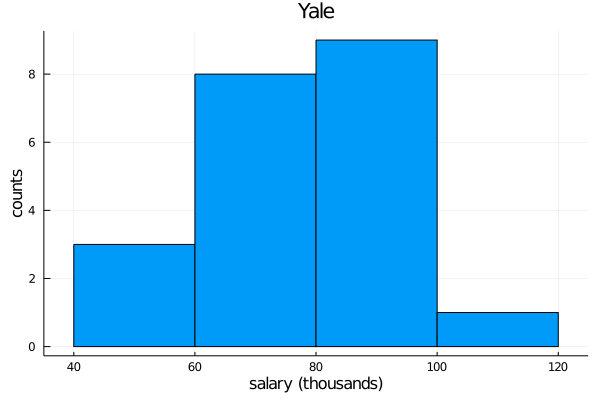

In [305]:
histogram(yale, title = "Yale", xlabel = "salary (thousands)", ylabel = "counts", legend = false)

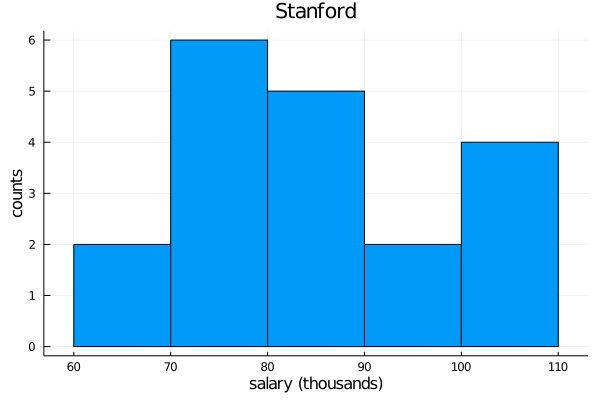

In [306]:
histogram(stanford, title = "Stanford", xlabel = "salary (thousands)", ylabel = "counts", legend = false)

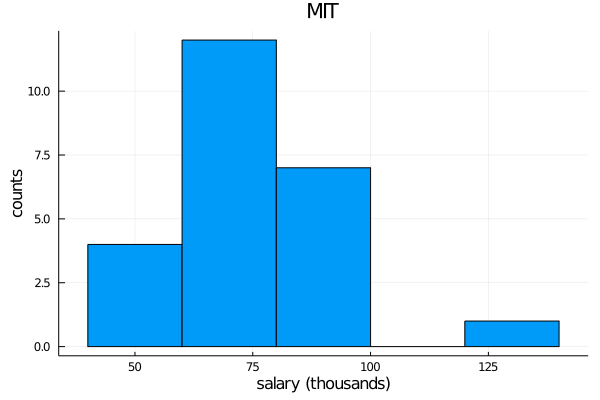

In [307]:
histogram(mit, title = "MIT", xlabel = "salary (thousands)", ylabel = "counts", legend = false)

Samples are indeed independent. We assume that salary variance among students from each of the 4 universities of interest are similar (this seems like a fair assumption). Note that each of the samples are not the same size. This is okay -- all that matters is that our assumptions of normality, independence, and equal variance are satisfied.

Our null hypothesis is that the average salaries of recent graduates from each of the 4 universities are all the same.

Our alternate hypothesis is that the average salaries of recent graduates from each of the 4 universities are not all the same.

We will set an alpha level of 0.05 for this statistical test, meaning that only $5\%$ of the area under the F distribution will fall lie above the critical value. The F distribution takes in two parameters, the degrees of freedom of the variance between groups (which is the number of groups - 1) and the degrees of freedom of the variance within groups (which is the total number of data points minus the number of groups). In this case, we have 82 total data points and 4 groups, so we will use the F distribution given by $F(78, 3)$. We can get the critical value using the quantile function in Julia:

In [171]:
quantile(FDist(3, 78), .95)  # calculate the critical value of the F statistic with 3 and 78 degrees of freedom
                             #  and alpha = .05

2.721783382145367

We find that the rejection region for this test is the set of F statistic values greater than approximately 2.72.

Now it is time to calculate the F statistic. Previously, we defined the F statistic to be the ratio of the variance between groups to the variance within groups. While this definition is great for building intuition, we need to somehow define the variance between groups and the variance within groups in a way that we can calculate.

The sum of squares for treatments, or SST, measures the variance between groups.

$$SST = \sum_{i=1}^{k} n_{i}\left(\bar{Y}_{i} - \bar{Y}\right)^2$$

where $k$ is the number of groups, $n_{i}$ is the size of the sample from the $i^{th}$ group, $\bar{Y}_{i}$ is the mean of the $i^{th}$ group, and $\bar{Y}$ is the total mean across all groups.

The sum of squares  for errors, or SSE, measures the variance within groups.

$$SSE = \sum_{i=1}^{k}\sum_{j=1}^{n_{i}} \left({Y}_{ij} - \bar{Y}_{i}\right)^2$$

where $k$ is once again the number of groups, $n_{i}$ is once again the size of the sample from the $i^{th}$ group, ${Y}_{ij}$ is the $j^{th}$ entry of the $i^{th}$ group, and $\bar{Y}_{i}$ is the mean of the $i^{th}$ group.

The F statistic is defined as follows:

$$F = \frac{mean squares of errors (MSE)}{mean squares of treatments (MST)}$$

Mean squares are simply sums of squares divided by the degrees of freedom for that sum of squares. For SST, the degrees of freedom is the number of groups minus 1, while for SSE, the degrees of freedom is the total number of data points across all groups minus the number of groups. This yields:

$$F = \frac{(\frac{SSE}{SSE degrees of freedom})}{(\frac{SST}{SST degrees of freedom})}$$

Now that we have our formulas, we can calculate the F statistic for our example.

In [297]:
all_data = [harvard; yale; stanford; mit]; #  combine all the data into one group

We begin by calculating the average among all our data points:

In [291]:
Y_bar = mean(all_data)  # calculate total mean across all groups
println("total average salary = ", Y_bar)

total average salary = 77.67479057261374


Then we find the average of each group individually:

In [292]:
Ys = [round(mean(school), digits=3) for school in schools]  # calculate the means of each group

names = ["Harvard", "Yale", "Stanford", "MIT"]
var = hcat(names, Ys)
pretty_table(var, ["University", "Sample Average Salary (thousands)"])

┌────────────┬───────────────────────────────────┐
│ University │ Sample Average Salary (thousands) │
├────────────┼───────────────────────────────────┤
│    Harvard │                            72.888 │
│       Yale │                            77.021 │
│   Stanford │                             85.11 │
│        MIT │                            75.951 │
└────────────┴───────────────────────────────────┘


Followed by calculations for the SST and SSE...

In [294]:
ns = [length(school) for school in schools]  # number of samples in each group
k = length(schools)  #  number of groups

SST = round(sum([ns[i] * (Ys[i] - Y_bar)^2 for i in 1:k]), digits=0)  # calculate SST
println("SST = $SST")

SST = 1543.0


In [295]:
data_by_group = [harvard, yale, stanford, mit]

SSE = round(sum([(data_by_group[i][j] - Ys[i])^2 for i in 1:k for j in 1:ns[i]]), digits=0)  # calculate SSE
println("SSE = $SSE")

SSE = 19222.0


Next, find the degrees of freedom for SST and SSE, respectively.

In [257]:
SST_degrees_of_freedom = k - 1  # SST degrees of freedom
SSE_degrees_of_freedom = sum(ns) - k  # SSE degrees of freedom

println("SST degrees of freedom = $SST_degrees_of_freedom")
println("SSE degrees of freedom = $SSE_degrees_of_freedom")

SST degrees of freedom = 3
SSE degrees of freedom = 78


And finally, we get the F statistic for this hypothesis test.

In [296]:
F = round((SST/SST_degrees_of_freedom) / (SSE/SSE_degrees_of_freedom), digits=3)  # calculate T statistic
println("F Statistic = $F")

F Statistic = 2.087


We can plot the F distribution, the rejction region, and the F statistic to visualize the results of this hypothesis test.

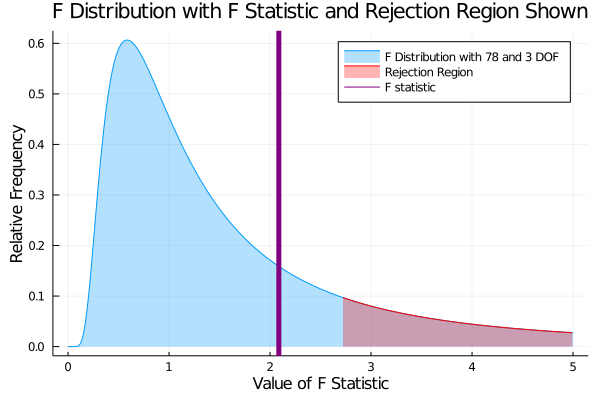

In [282]:
plot(0:.01:5, x -> pdf(FDist(78, 3), x), fillrange = 0, fillopacity = .3, label = "F Distribution with 78 and 3 DOF",
    title = "F Distribution with F Statistic and Rejection Region Shown", ylabel = "Relative Frequency", 
    xlabel = "Value of F Statistic")
plot!(2.722:.01:5, x -> pdf(FDist(78, 3), x), fillrange = 0, fillopacity = .3, 
    color = "red", label = "Rejection Region")
vline!([2.087], linewidth = 5, label = "F statistic", color = "purple")


The F statistic clearly falls below the rejection region. We therefore fail to reject the null hypothesis that post-graduation salary is the same for students from Harvard, Yale, Stanford, and MIT. If we want, we could also calculate a p-value for the F statistic for this hypothesis test.

In [287]:
p_value = 1 - cdf(FDist(78, 3), F)
println("p-value = $p_value")

p-value = 0.30228782115982644


This p-value is well above the alpha value of .05. This is another way to think about why we reject the null hypothesis.

## Other ANOVA Tests and Post Hoc Methods

One-Way ANOVAs are the simplest, most basic form of ANOVA. Sometimes, though, the one-way ANOVA is insufficient. Suppose, for instance, that we wanted to know whether or not students from the 4 aforementioned universities make the same starting salary post-graduation and whether or not this depends on gender. Now there is still one quantitative response variable, salary, but two independent categorical variables, namely university attended and gender. Here, we would need to perform a two-way ANOVA. What we really want to know is whether the relationship between university attended and post-graduation salary depends on gender. Is it possible that Harvard and Yale have higher post-graduation salaries for men, while MIT and Stanford have highger post-graduation salaries for women? Or is the effect of university attended on post-graduation salary independent of gender?

To answer these questions, we actually need to perform 4 different hypothesis tests. First, we run a one-way ANOVA with 8 groups (4 universities * 2 genders). Next, we run a one-way ANOVA with 4 groups (4 universities) and another one-way ANOVA with 2 groups (2 genders). What we are really interested in with a two-way ANOVA, however, is the interaction between gender and university attended. We take the total sum of squares for treaments (total SST) from the first hypothesis test with all 8 groups, and then subtract the SST for the hypothesis test grouped by gender and the SST for the hypothesis test grouped by university. The remaining value is the SST for the interaction term. Like with a one-way ANOVA, we then divide the SST and SSE by their respective degrees of freedom and calculate the ratio to find the F statistic. F statistics falling above the critical point indicate that an interaction exists between the two explanatory variables. Note that it is actually possible to run a three, four, or n-way ANOVA, but such tests get complicated very quickly and can produce results that are difficult to interpret meaningfully (as you can imagine, things get messy when there are many different interaction terms).

Another form of ANOVA is multivariate analysis of variance, or MANOVA. While a two-way ANOVA is used when we have 2 independent variables and one dependent variable, a MANOVA is used when we have one independent categorical variable and 2 (or more) quantitative dependent variables. For example, suppose we wanted to know if university attended is associated with post-graduation salary or post-graduation level of LDL cholesterol (perhaps dining hall food and on-campus fitness opportunities impact health metrics such as cholesterol over a 4 year time span). A MANOVA would test the hypothesis that neither salary nor LDL cholesterol are different based on university attended. A rejection of the null hypothesis would indicate that at least one of the response variables differs across groups, but the MANOVA would not identify $\textit{which}$ variable(s) differ across groups. There is also a two-way analog for for MANOVA.

As previously discussed, ANOVA tackles broad stroke questions about similarity among 3 or more groups. However, if we reject the null hypothesis when performing a one-way ANOVA, we only know that the groups are not all the same. Perhaps of the 4 groups, 3 of them are identical while the fourth one is way different. Alternatively, maybe each group is marginally different from the others. Sometimes, it is not enough to know that groups are not all the same; rather, we want to know where, specifically, they differ. While there are several approaches to reaching more fine-grained conclusions about the relationships between different groups, the most common is Tukey's HSD (honestly significant difference) test. Tukey's HSD test essentially compares each pair of groups to each other, much in the same way that a t-test would, except it adjusts resulting p-values of these comparisons to limit the total chance of type 1 error (falsely rejecting the null hypothesis) across all comparisons. The results of Tukey's HSD test are each pair of groups that differ significantly after correction for total type 1 error.

Admittedly, ANOVA is a huge topic, and this blog post only scratches the surface. However, my hope is that you now understand what ANOVA is, when and how it is used, and some of its variations.

## References

https://www.researchgate.net/profile/Barbara_Tabachnick/publication/259465542_Experimental_Designs_Using_ANOVA/links/5e6bb05f92851c6ba70085db/Experimental-Designs-Using-ANOVA.pdf

Wackerly, Dennis D., et al. Mathematical Statistics with Applications. Brooks/Cole, 2012. 

https://books.google.com/books?hl=en&lr=&id=hlwlmQ9Df7UC&oi=fnd&pg=PR2&dq=ANOVA&ots=JFErpflM-F&sig=cTu12qomNTJVP-c_BJpAYFWp-Tc#v=onepage&q=ANOVA&f=false

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ANOVA/BS704_HypothesisTesting-Anova5.html

https://www3.nd.edu/~rwilliam/stats1/x61.pdf

https://www3.nd.edu/~rwilliam/stats1/x61.pdf
